# Introduction to the Mandelbrot Set

Before thinking about what different parts of the **Mandelbrot set** may mean, what exactly *is* the Mandelbrot set? The most concise definition is that which Wikipedia gives:

> "The Mandelbrot set is a two-dimensional set that is defined in the complex plane as the complex numbers $c$ for which the function $f_c(z) = z^2+ c$ does not diverge to infinity when iterated starting at $z=0$" [@wikipedia_mandelbrot_set]

But what does this exactly mean?

This means that if you take a complex number $c$ of the form $a+bi$ and let $z_0=0$, and define $z_{n+1}=z_{n}^2+c$ and repeatedly iterate through this iterative formula, you have two possible options - it "blows up" to infinity, or it remains stable. Here is an example (where $c$ is a real number) when $c=-1$

$$
\begin{aligned}
z_1&=0^2-1&&=-1 \\
z_2&=-1^2-1 &&= 0\\
z_3 &&&=-1
\end{aligned}
$$

Here you see that when $c=-1$, then the sequence bounces between -1 and 0. **It is stable, and hence in the Mandelbrot set.**

Let's look at a second example, when $c=1$

$$
\begin{aligned}
z_1 &= 0^2+1 &&= 1 \\
z_2 &= 1^2+1 &&= 2 \\
z_3 &= 2^2+1 &&= 5 \\
z_4 &= 5^2+1 &&= 26 \\
\end{aligned}
$$

Therefore, we see that using $c=1$ quickly produces larger numbers till infinity, and can conclude that $c=1$ **is outside the Mandelbrot set**

Let's take a look at a 3rd example where $c$ is a complex number such as $c=1+i$

$$
\begin{aligned}
z_1 &= 0^2+1+i &&=1+i \\
z_2 &=(1+i)^2 +1+i &&=1+3i \\
z_3 &= (1+3i)^2 + 1+i&&=-7+7i \\
z_4 &= (-7+7i)^2 + 1+i &&= 1-97i \\
\end{aligned}
$$

Looking at the magnitudes^\[1\]^ of the complex numbers, we see that they diverge to infinity again, concluding that $c=1+i$ **is again outside the Mandelbrot set.**

For what this would look like on the complex plane, where points in the Mandelbrot set are in black, and points outside the Mandelbrot set are in white, see @fig-mandelbrot-basic

/tmp/ipykernel_55751/2901218406.py:15: RuntimeWarning: overflow encountered in multiply
  Z = Z*Z + C
/tmp/ipykernel_55751/2901218406.py:15: RuntimeWarning: invalid value encountered in multiply
  Z = Z*Z + C


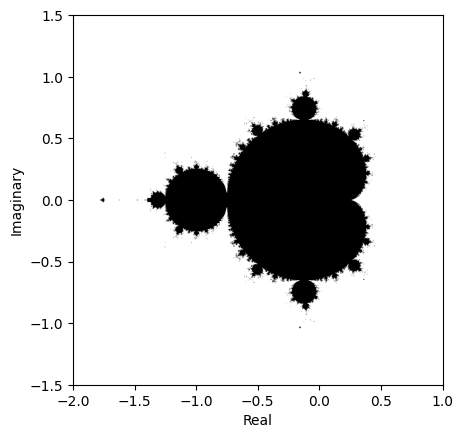

In [ ]:
#| label: fig-mandelbrot-basic
#| fig-cap: "Mandelbrot set on the complex plane"
#| warning: false
import numpy as np
import matplotlib.pyplot as plt

def complex_matrix(xmin, xmax, ymin, ymax, pixel_per_unit_width, pixels_per_unit_height):
    re = np.linspace(xmin, xmax, int((xmax-xmin)*pixel_per_unit_width))
    im = np.linspace(ymin, ymax, int((ymax-ymin)*pixels_per_unit_height))
    return re[np.newaxis, :] + 1j * im[:, np.newaxis]
def mandelbrot(C, max_iter):
  Z = np.zeros(C.shape, dtype=complex)
  mask = np.ones(C.shape, dtype=bool)
  for i in range(max_iter):
      Z = Z*Z + C
      mask &= np.abs(Z) <= 2

  return mask

C = complex_matrix(-2, 1, -1.5, 1.5, 300, 300)
mandelbrot_set = mandelbrot(C, 50)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.imshow(mandelbrot_set, extent=[-2,1,-1.5,1.5], cmap='binary')


Here we see the most famous fractal in mathematics - the Mandelbrot set, which we found by a simple mathematical rule. The axes on @fig-mandelbrot-basic denote the real and imaginary parts of the complex number $c=a+bi$ where $a$ is the real value on the x axis and $b$ is the imaginary value on the y axis .

^\[1\]^ Magnitude of a complex number $z=a+bi$ is defined as $\sqrt{a^2+b^2}$

# The Bulbs
## The Bifurcation of the Quadratic Map